# Análise de vendas de supermercado (dados sinteticos)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("market.csv")

In [3]:
print(df.shape)

(1000, 17)


In [4]:
df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
# Limpeza dos dados
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

### Não há valor ausente e o conjunto de dados está limpo, portanto, continuaremos com a visualização de dados.

In [ ]:
##############################################################################################################################################

## Checando as informações do dataset


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   object        
 11  Time                     1000 non-null   datetime64[ns]
 12  Payment                  1000 non-n

In [7]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [8]:
print("O dataset contém {} linhas e {} colunas".format(df.shape[0],df.shape[1]))

O dataset contém 1000 linhas e 17 colunas


## Agora usamos diferentes ferramentas de visualização para verificar diferentes aspectos das vendas do Supermercado.

### contagem de gênero

C:\Users\BlueShift\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


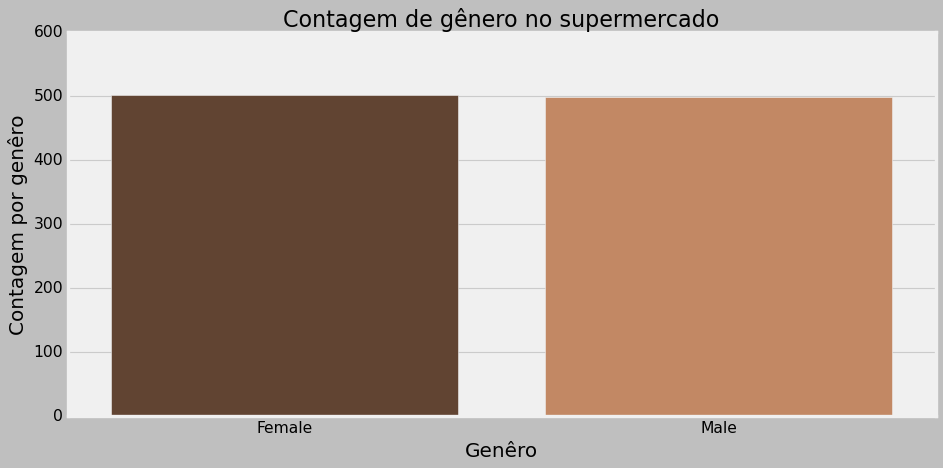

In [43]:
plt.figure(figsize=(14,6))
plt.style.use('fivethirtyeight')
ax= sns.countplot('Gender', data=df , palette = 'copper')
ax.set_xlabel(xlabel= "Genêro",fontsize=18)
ax.set_ylabel(ylabel = "Contagem por genêro", fontsize = 18)
ax.set_title(label = "Contagem de gênero no supermercado", fontsize = 20)
plt.show()

#### Aqui podemos ver que o número de homens e mulheres que entram na loja é quase igual.
#### Mas a visualização parece suspeita. Vamos verificar os dados numéricos.

In [13]:
df.groupby(['Gender']). agg({'Total':'sum'})

,Total
Gender,
Female,167882.925
Male,155083.824


#### A visualização parece boa. Vamos continuar.

### Tipo de cliente

Text(0, 0.5, 'Contagem de clientes')

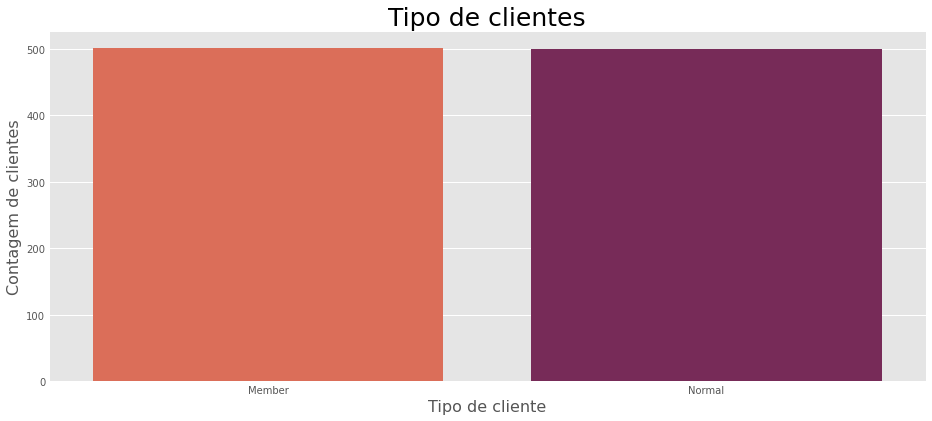

In [15]:

plt.style.use('ggplot')
plt.figure(figsize= (14,6))
ax = sns.countplot(x = "Customer type", data = df, palette = "rocket_r")
ax.set_title("Tipo de clientes", fontsize = 25)
ax.set_xlabel("Tipo de cliente", fontsize = 16)
ax.set_ylabel("Contagem de clientes", fontsize = 16)

In [16]:
df.groupby(['Customer type']). agg({'Total':'sum'})

,Total
Customer type,
Member,164223.444
Normal,158743.305


#### Acima, podemos ver o tipo de cliente em todas as agências combinadas, agora vamos verificar as diferentes agências.

Text(0, 0.5, 'Customer Count')

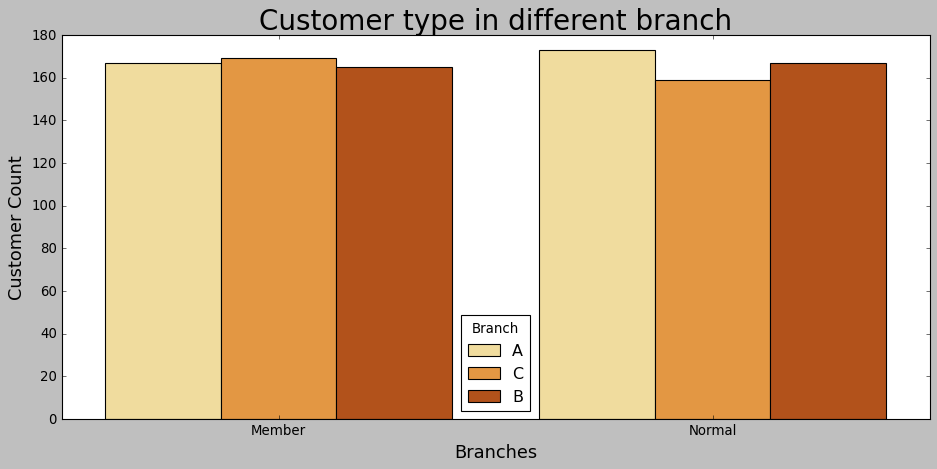

In [41]:
plt.figure(figsize=(14,6))
plt.style.use('classic')
ax = sns.countplot(x = "Customer type", hue = "Branch", data = df, palette= "YlOrBr")
ax.set_title(label = "Customer type in different branch", fontsize = 25)
ax.set_xlabel(xlabel = "Branches", fontsize = 16)
ax.set_ylabel(ylabel = "Customer Count", fontsize = 16)

In [ ]:
### Distribuição da forma de pagamento em todas as agências

Text(0, 0.5, 'Peple Count')

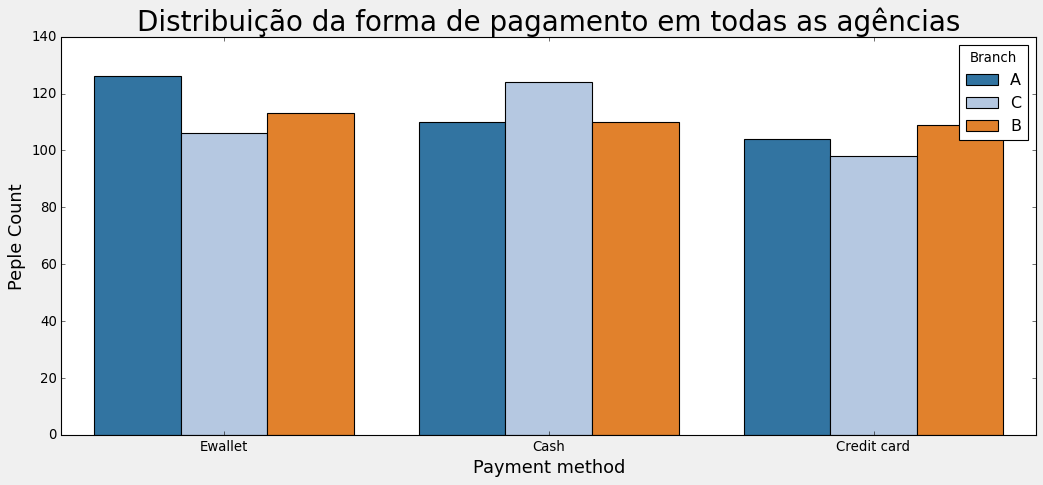

In [45]:


plt.figure(figsize = (14,6))
plt.style.use('classic')
ax = sns.countplot(x="Payment", hue = "Branch", data = df, palette= "tab20")
ax.set_title(label = "Distribuição da forma de pagamento em todas as agências", fontsize= 25)
ax.set_xlabel(xlabel = "Payment method", fontsize = 16)
ax.set_ylabel(ylabel = "Peple Count", fontsize = 16)

Text(0, 0.5, 'Distribuição por avaliação')

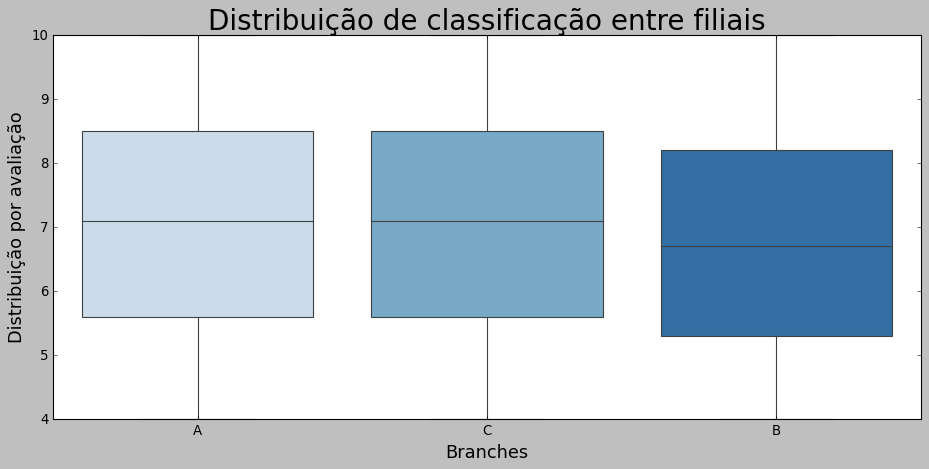

In [40]:
plt.figure(figsize=(14,6)) 
ax = sns.boxplot(x="Branch", y = "Rating" ,data =df, palette= "Blues")
ax.set_title("Distribuição de classificação entre filiais", fontsize = 25)
ax.set_xlabel(xlabel = "Branches", fontsize = 16)
ax.set_ylabel(ylabel = "Distribuição por avaliação", fontsize = 16)

### Podemos ver que a classificação média do ramo A e C é superior a sete e o ramo B é inferior a 7.

## Tempo máximo de vendas

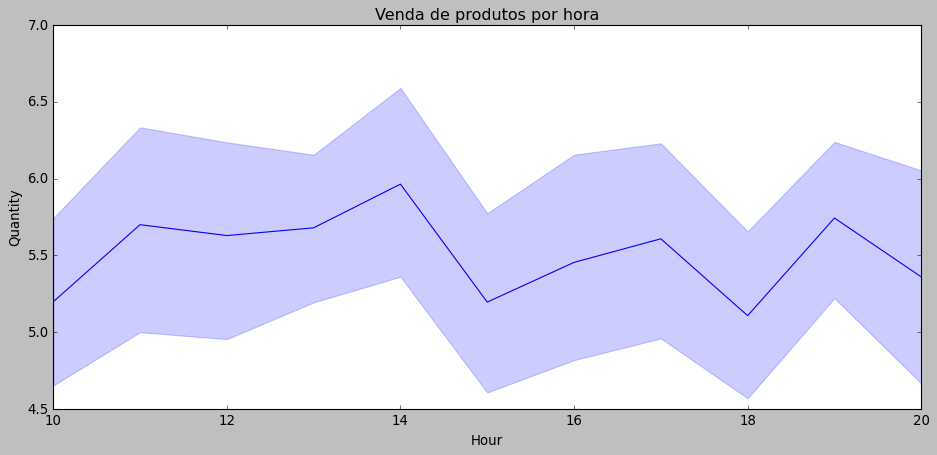

In [22]:
df["Time"]= pd.to_datetime(df["Time"])
df["Hour"]= (df["Time"]).dt.hour
plt.figure(figsize=(14,6))
plt.style.use('classic')
SalesTime = sns.lineplot(x="Hour", y ="Quantity", data = df).set_title("Venda de produtos por hora")

### Podemos ver que o supermercado faz a maior parte das suas vendas às 14:00 horas, hora local.

## Avaliação x Vendas

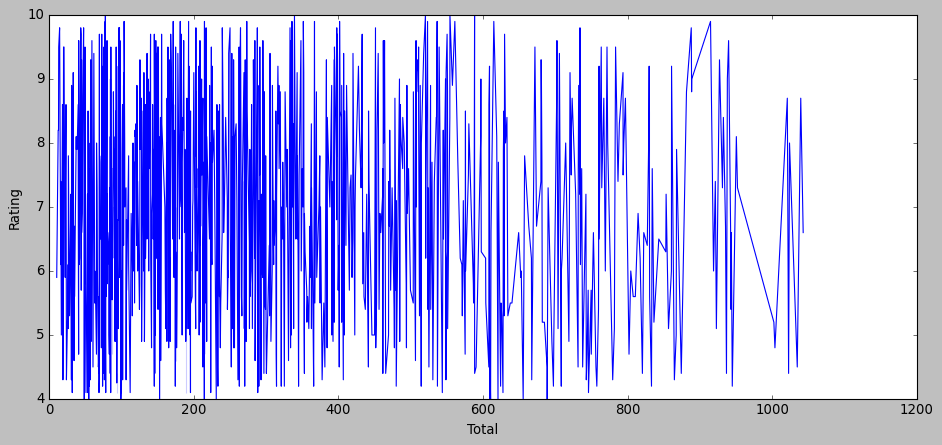

In [25]:
plt.figure(figsize=(14,6))
plt.style.use('classic')
rating_vs_sales = sns.lineplot(x="Total", y= "Rating", data=df)

## Usando bloxen plot

Text(0, 0.5, 'Linha de produtos')

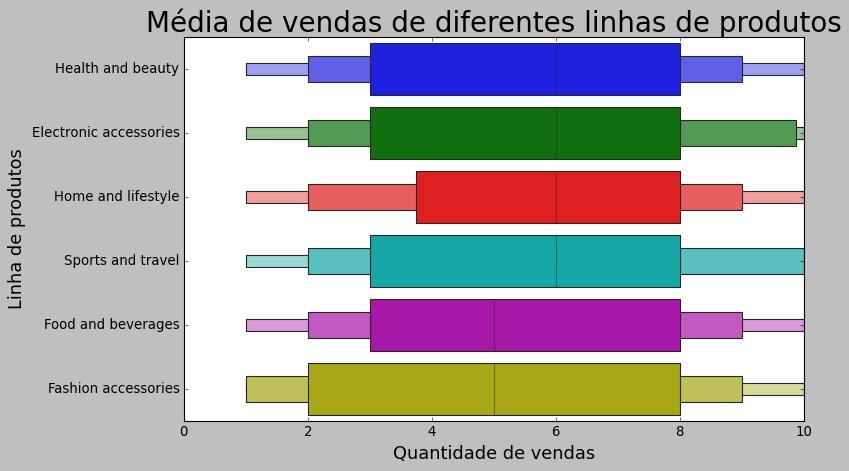

In [27]:
plt.figure(figsize=(10,6))
plt.style.use('classic')
ax = sns.boxenplot(x = "Quantity", y = "Product line", data = df,)
ax.set_title(label = "Média de vendas de diferentes linhas de produtos", fontsize = 25)
ax.set_xlabel(xlabel = "Quantidade de vendas",fontsize = 16)
ax.set_ylabel(ylabel = "Linha de produtos", fontsize = 16)

### Aqui podemos ver que a média de vendas das diferentes linhas de produtos.
### Saúde e beleza são as vendas mais altas, enquanto os acessórios Fashon são as vendas mais baixas.

In [ ]:
#########################################################################################################################################

# contagem de vendas desses produtos.

Text(0, 0.5, 'Linha de produtos')

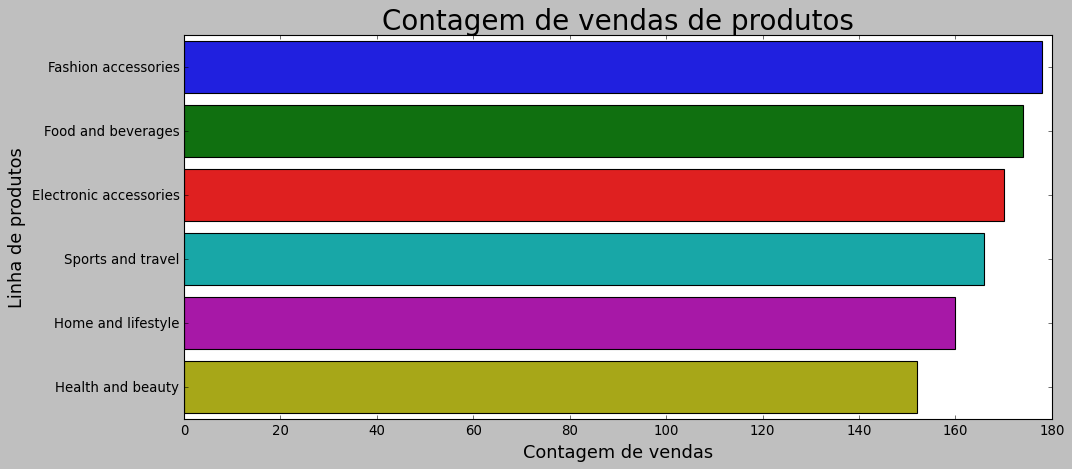

In [30]:
plt.figure(figsize=(14,6))
ax = sns.countplot(y='Product line', data=df, order = df['Product line'].value_counts().index)
ax.set_title(label = "Contagem de vendas de produtos", fontsize = 25)
ax.set_xlabel(xlabel = "Contagem de vendas", fontsize = 16)
ax.set_ylabel(ylabel= "Linha de produtos", fontsize = 16)

## Total de vendas do produto usando boxenplot

Text(0, 0.5, 'Linha de produtos')

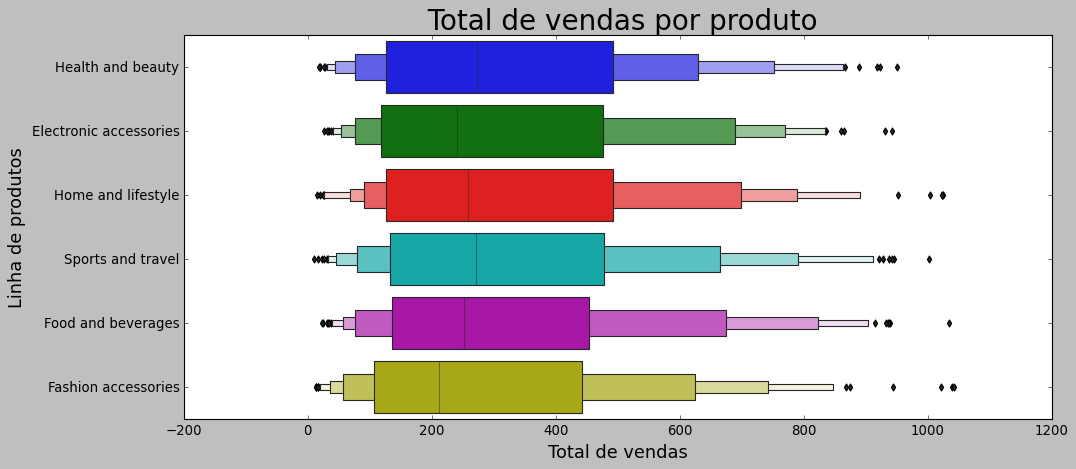

In [32]:
plt.figure(figsize=(14,6))
plt.style.use('classic')
ax = sns.boxenplot(y= "Product line", x= "Total", data = df)
ax.set_title(label = " Total de vendas por produto", fontsize = 25)
ax.set_xlabel(xlabel = "Total de vendas", fontsize = 16)
ax.set_ylabel(ylabel = "Linha de produtos", fontsize = 16)

## classificações médias dos produtos.

Text(0, 0.5, 'Linhas de produtos')

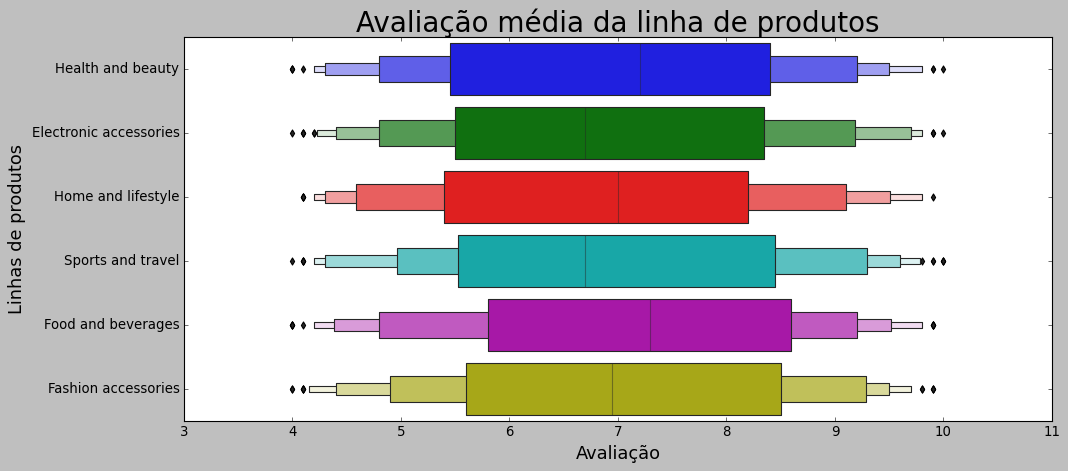

In [34]:
plt.figure(figsize = (14,6))
plt.style.use('classic')
ax = sns.boxenplot(y = "Product line", x = "Rating", data = df)
ax.set_title("Avaliação média da linha de produtos", fontsize = 25)
ax.set_xlabel("Avaliação", fontsize = 16)
ax.set_ylabel("Linhas de produtos", fontsize = 16)

## Vendas de produtos com base no gênero

Text(0, 0.5, 'Linha de produtos')

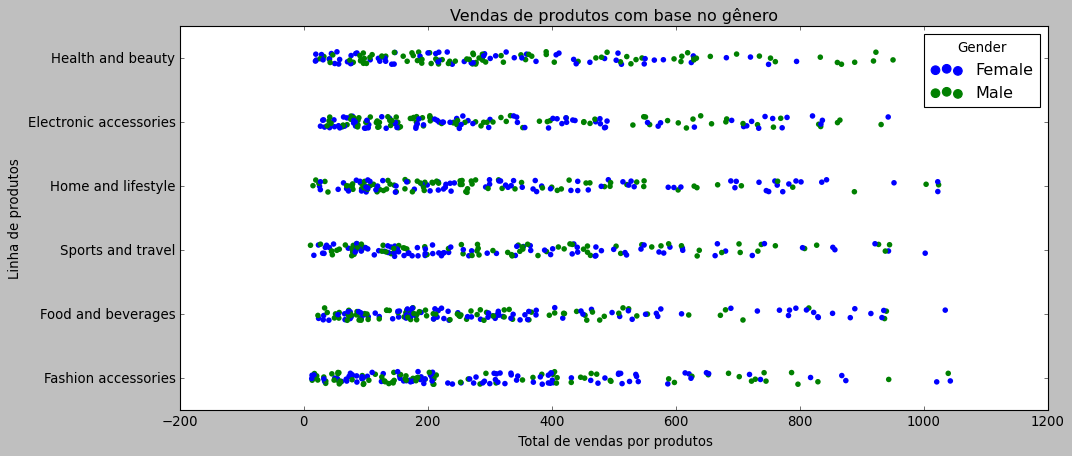

In [36]:
plt.style.use('classic')
plt.figure(figsize = (14,6))
ax= sns.stripplot(y= "Product line", x = "Total", hue = "Gender", data = df)
ax.set_title(label = "Vendas de produtos com base no gênero")
ax.set_xlabel(xlabel = " Total de vendas por produtos")
ax.set_ylabel(ylabel = "Linha de produtos")

## Produto e receita bruta

In [ ]:
plt.figure(figsize = (14,6))
plt.style.use('classic')
ax = sns.relplot(y= "Product line", x = "gross income", data = df)
# ax.set_title(label = "Products and Gross income")
# ax.set_xlabel(xlabel = "Total gross income")
# ax.set_ylabel(ylabel = "Product line")